Dataset Shape: (200, 5)

Missing Values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


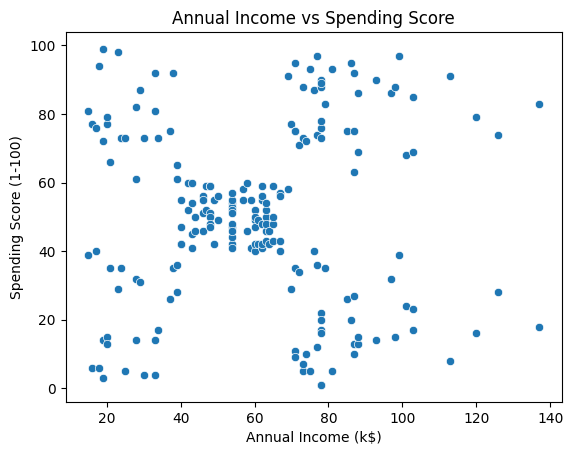

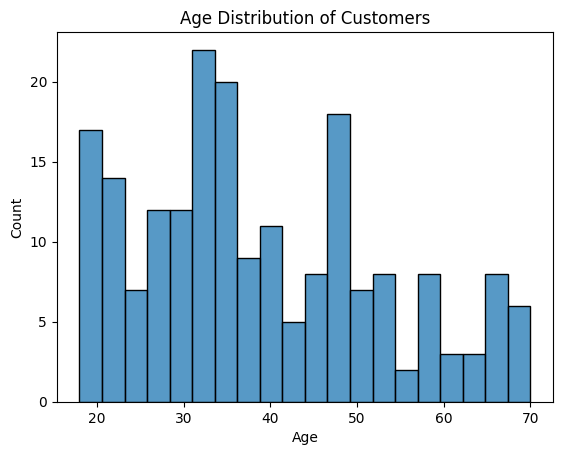

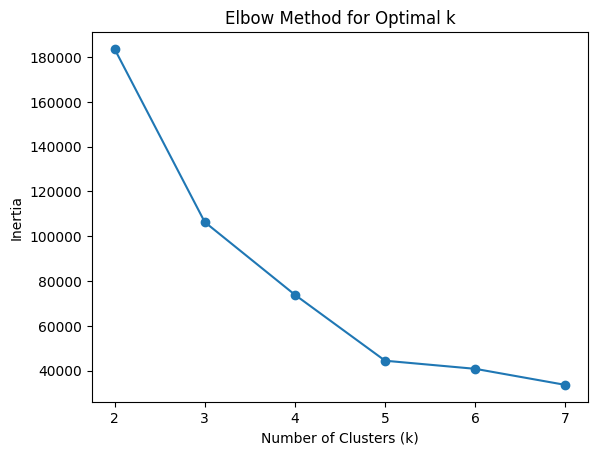

Silhouette Score: 0.553931997444648
Inertia: 44448.45544793369


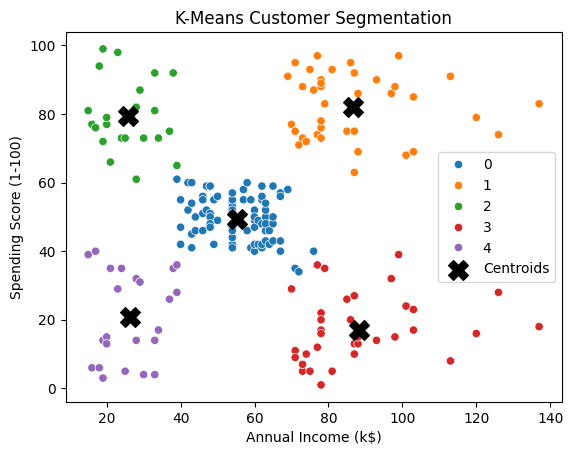

In [2]:
# ============================================
# EASY LEVEL: K-Means Clustering
# Dataset: Mall Customer Segmentation
# ============================================

# Import required libraries
import pandas as pd                 # For data handling
import matplotlib.pyplot as plt     # For plotting graphs
import seaborn as sns               # For better visualizations
from sklearn.cluster import KMeans  # K-Means clustering algorithm
from sklearn.metrics import silhouette_score  # Clustering evaluation metric

# --------------------------------------------
# Step 1: Load the dataset
# --------------------------------------------
df = pd.read_csv("Mall_Customers.csv")

# --------------------------------------------
# Step 2: Basic EDA (Exploratory Data Analysis)
# --------------------------------------------

# Display shape of dataset (rows, columns)
print("Dataset Shape:", df.shape)

# Check for missing values
print("\nMissing Values in each column:")
print(df.isnull().sum())

# --------------------------------------------
# Step 3: Visual EDA (Minimum 2 plots)
# --------------------------------------------

# Plot 1: Relationship between Income and Spending Score
plt.figure()
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)']
)
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

# Plot 2: Distribution of Age
plt.figure()
sns.histplot(df['Age'], bins=20)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# --------------------------------------------
# Step 4: Feature Selection
# --------------------------------------------
# Selecting only relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# --------------------------------------------
# Step 5: Choose Optimal k using Elbow Method
# --------------------------------------------
inertia = []  # List to store inertia values

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Store inertia for each k

# Plot Elbow Curve
plt.figure()
plt.plot(range(2, 8), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# --------------------------------------------
# Step 6: Train Final K-Means Model
# --------------------------------------------
# Based on elbow curve, k = 5 is selected
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model and assign cluster labels
df['Cluster'] = kmeans.fit_predict(X)

# --------------------------------------------
# Step 7: Evaluate Clustering Performance
# --------------------------------------------

# Calculate Silhouette Score
sil_score = silhouette_score(X, df['Cluster'])

# Print evaluation metrics
print("Silhouette Score:", sil_score)
print("Inertia:", kmeans.inertia_)

# --------------------------------------------
# Step 8: Visualize Final Clusters
# --------------------------------------------
plt.figure()
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='tab10'
)

# Plot cluster centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    c='black',
    marker='X',
    label='Centroids'
)

plt.title("K-Means Customer Segmentation")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()
